## Load and preprocess data, then calculate the number of unique algorithmic and non-algorithmic sellers.


In [58]:
##Read in the Sellers who are algorithmic
df_algorithmic_seller_names = pd.read_csv('../Grunddatein/Zwischendatein/PA-Adopters.csv')
# rename column
df_algorithmic_seller_names = df_algorithmic_seller_names.rename(columns={'AlgorithmicSellerNames': 'sellerName'})  
# Check for duplicates in the entire DataFrame
duplicate_rows = df_algorithmic_seller_names.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# If you want to check for


Number of duplicate rows: 0


In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Grunddatein/Zwischendatein/CleanedDataCompleteNoNulls.csv')
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")

##Transform CrawlTime Column to DateTime Format
df['crawlTime'] = pd.to_datetime(df['crawlTime'])

## Exclude all Rows where condition isnt New and which where a reactive Crawl
df = df[df['condition'].isin(['Neu', 'New'])]

##Get the Number of Distinct Values
distinct_values_verkäufer = df['sellerName'].unique()
print(f"Es gibt insgesamt {len(distinct_values_verkäufer)} verschiedene Verkäufer")

# Create a new column to indicate if the seller is algorithmic or not
df['is_algorithmic'] = df['sellerName'].isin(df_algorithmic_seller_names['sellerName'])

# Calculate the number of algorithmic and non-algorithmic sellers
num_algo_sellers = df[df['is_algorithmic']]['sellerName'].nunique()
num_non_algo_sellers = df[~df['is_algorithmic']]['sellerName'].nunique()

print(f"Es gibt insgesamt {num_non_algo_sellers} Non-Algo Verkäufer")
print(f"Es gibt insgesamt {num_algo_sellers} Algo Verkäufer")
print(f"Sie Summieren sich richtig auf",num_algo_sellers + num_non_algo_sellers == len(distinct_values_verkäufer))

# Create two separate DataFrames for non-algorithmic and algorithmic seller names
non_algo_seller_names = df.loc[df['is_algorithmic'] == False, 'sellerName'].unique()
algo_seller_names = df.loc[df['is_algorithmic'] == True, 'sellerName'].unique()

df_non_algo_names = pd.DataFrame(non_algo_seller_names, columns=['sellerName'])
df_algo_names = pd.DataFrame(algo_seller_names, columns=['sellerName'])

C:\Users\Robert Betschinger\AppData\Local\Temp\ipykernel_12896\2231859804.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Grunddatein/Zwischendatein/CleanedDataCompleteNoNulls.csv')


Es gibt insgesamt 2262 verschiedene Verkäufer
Es gibt insgesamt 1696 Non-Algo Verkäufer
Es gibt insgesamt 566 Algo Verkäufer
Sie Summieren sich richtig auf True


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268716 entries, 0 to 6591110
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                float64       
 1   asin              object        
 2   price             float64       
 3   currency          object        
 4   time              datetime64[ns]
 5   crawlTime         datetime64[ns]
 6   condition         object        
 7   sellerName        object        
 8   sellerId          object        
 9   sellerbewertung   int64         
 10  seller_sterne     float64       
 11  lieferdatum       object        
 12  lieferpreis       float64       
 13  lieferung_durch   object        
 14  ranking           float64       
 15  buyBoxWinner      bool          
 16  numberOfSellers   float64       
 17  trigByReactive    object        
 18  Fulfillment_type  object        
 19  date_diff         float64       
 20  is_algorithmic    bool          
dtypes: bool(

In [47]:
# Filter dataframe for each seller
df_at_memory = df[df['sellerName'] == 'Schuh-Helden']
df_skyline_media = df[df['sellerName'] == 'Schuh-Lounge24']

# Get unique ASINs for each seller
asins_at_memory = set(df_at_memory['asin'].unique())
asins_skyline_media = set(df_skyline_media['asin'].unique())

# Find ASINs that appear in both sets (i.e., the intersection of the sets)
common_asins = asins_at_memory & asins_skyline_media

# Print the result
print(common_asins)


{'B099NPYRVF'}


In [26]:
# define a function to extract hour from datetime column
def get_hour(datetime_val):
    return datetime_val.hour

# apply the get_hour function to the 'time' column using apply method
df['hourTime'] = df['time'].apply(get_hour)

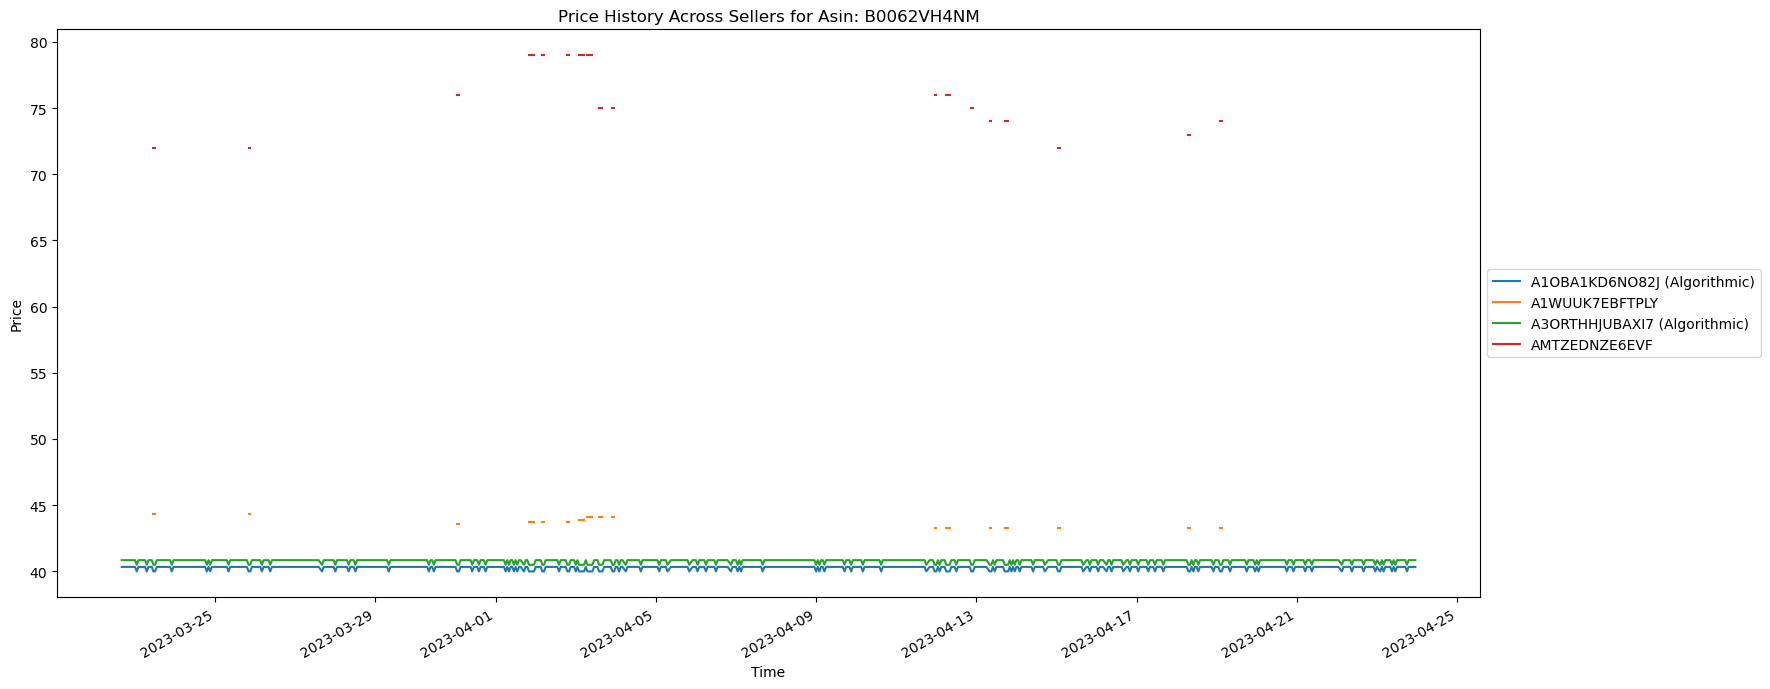

This is the ASIN B0062VH4NM


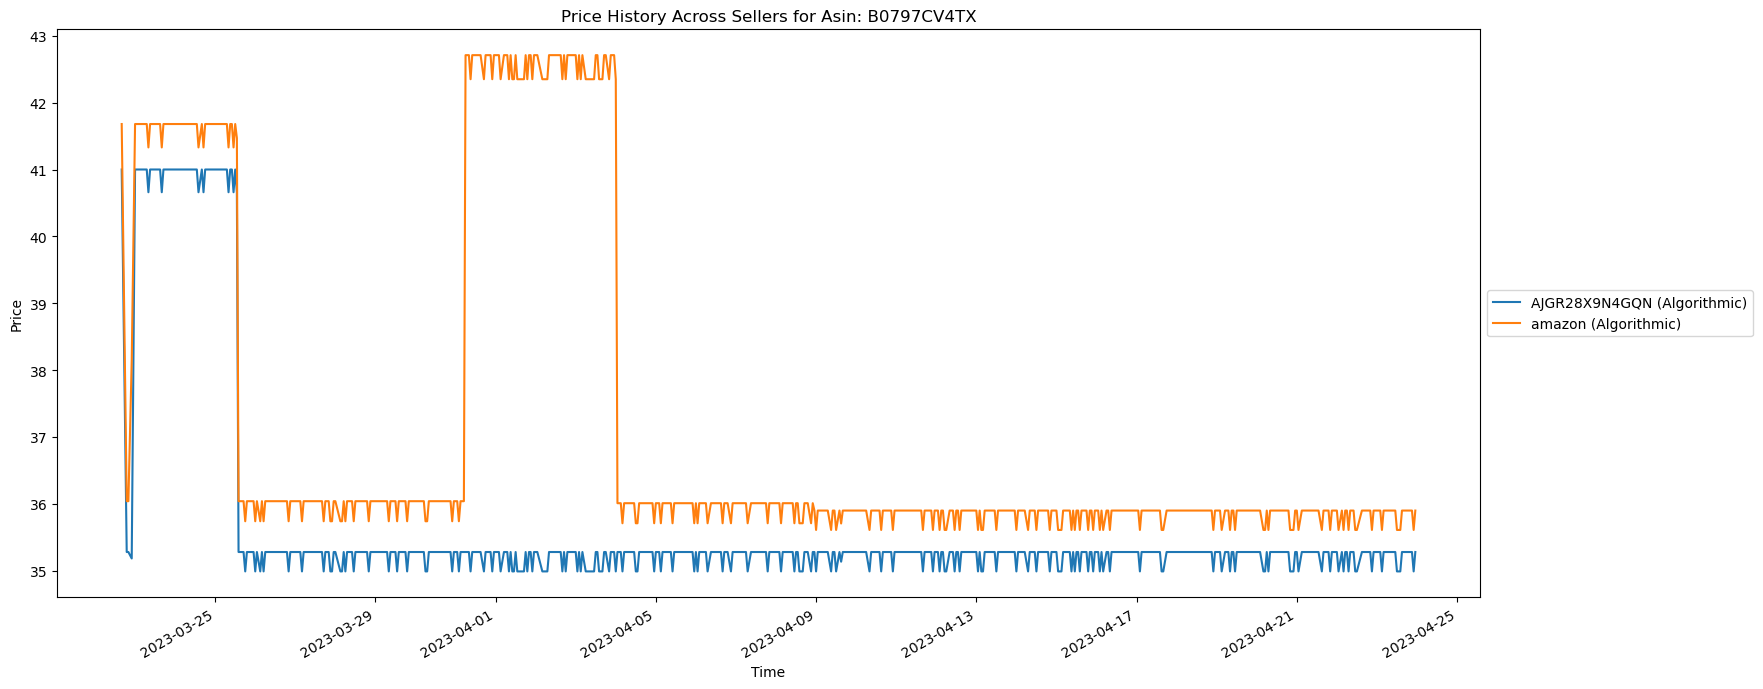

This is the ASIN B0797CV4TX


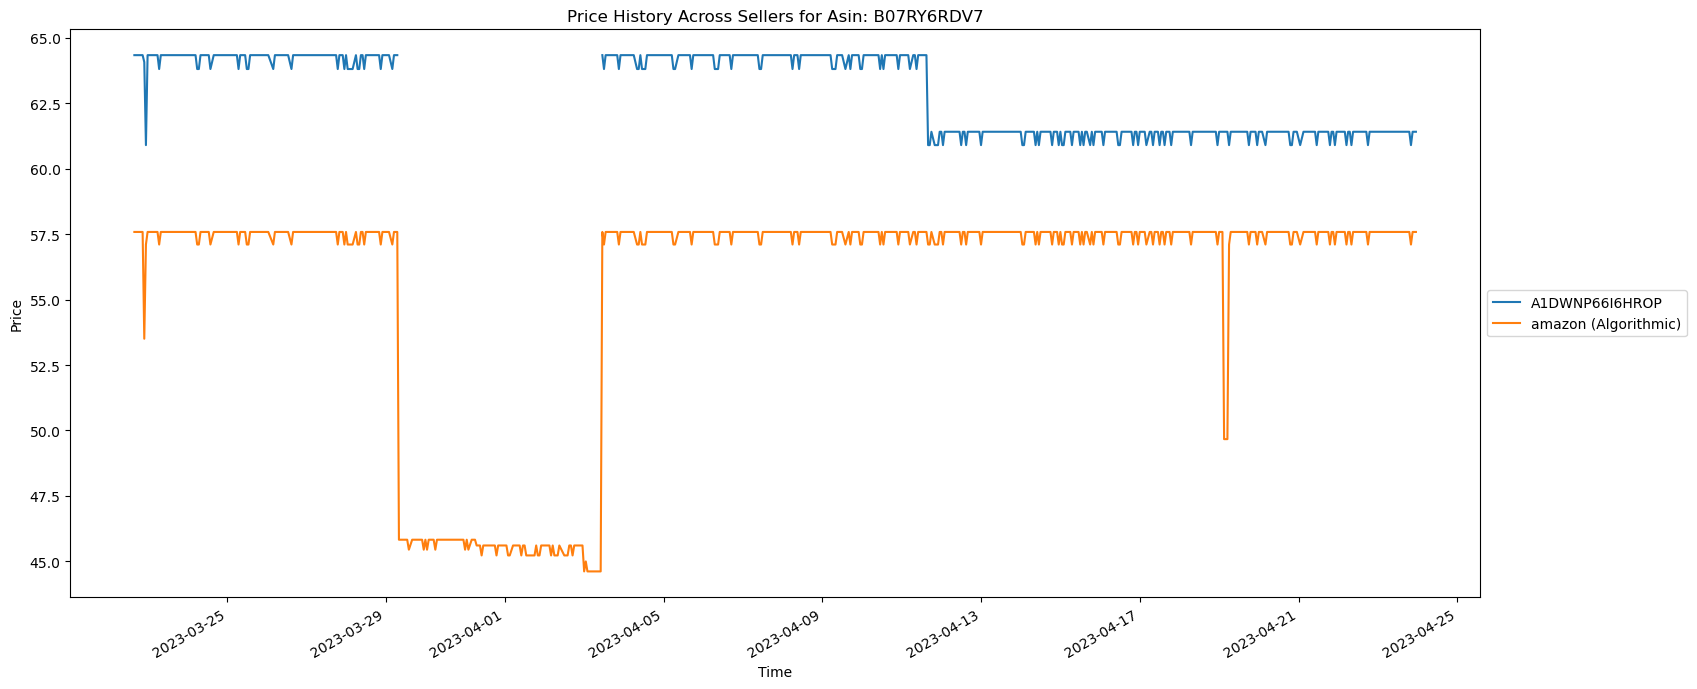

This is the ASIN B07RY6RDV7


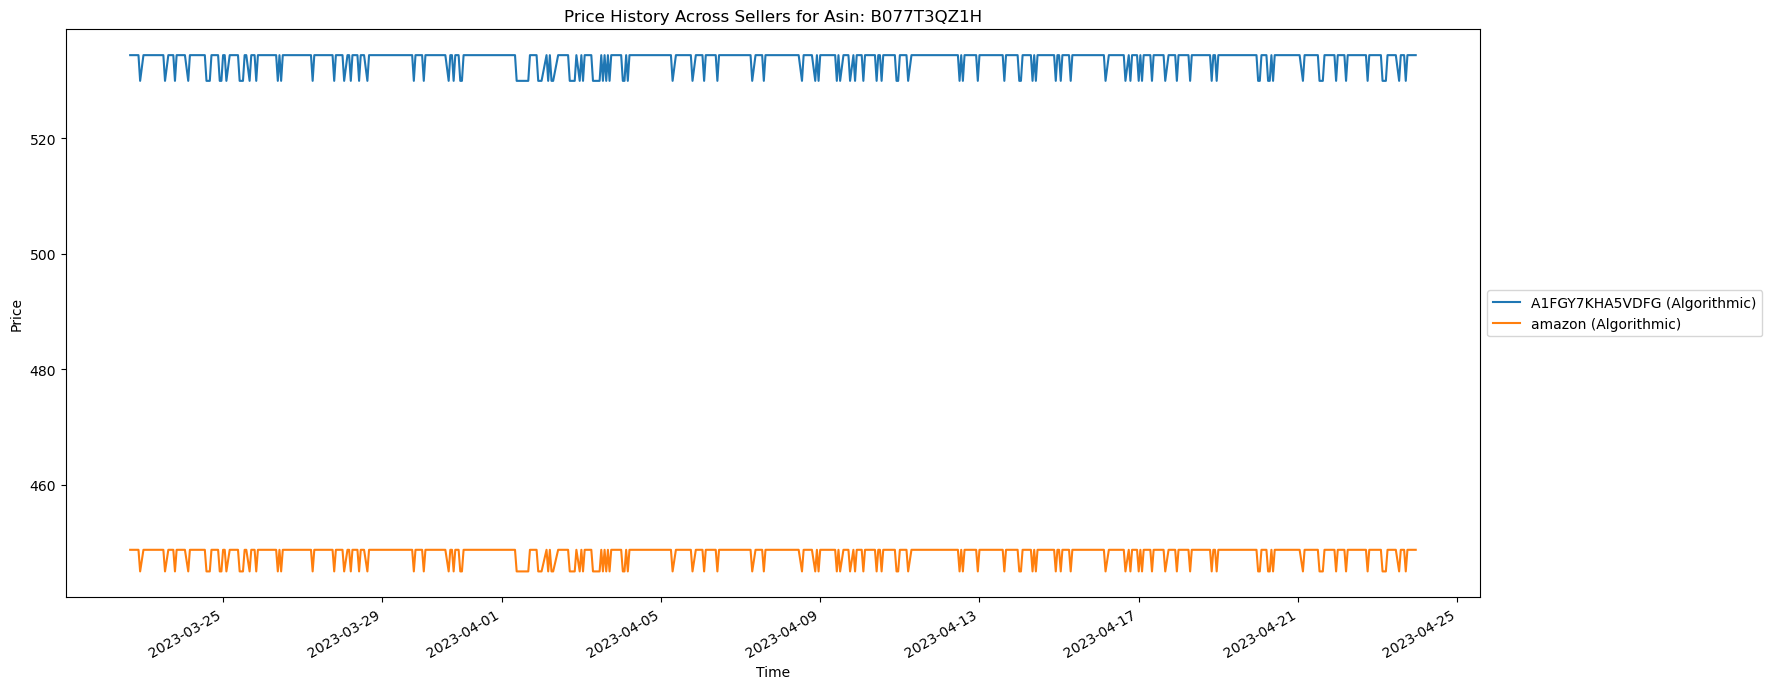

This is the ASIN B077T3QZ1H


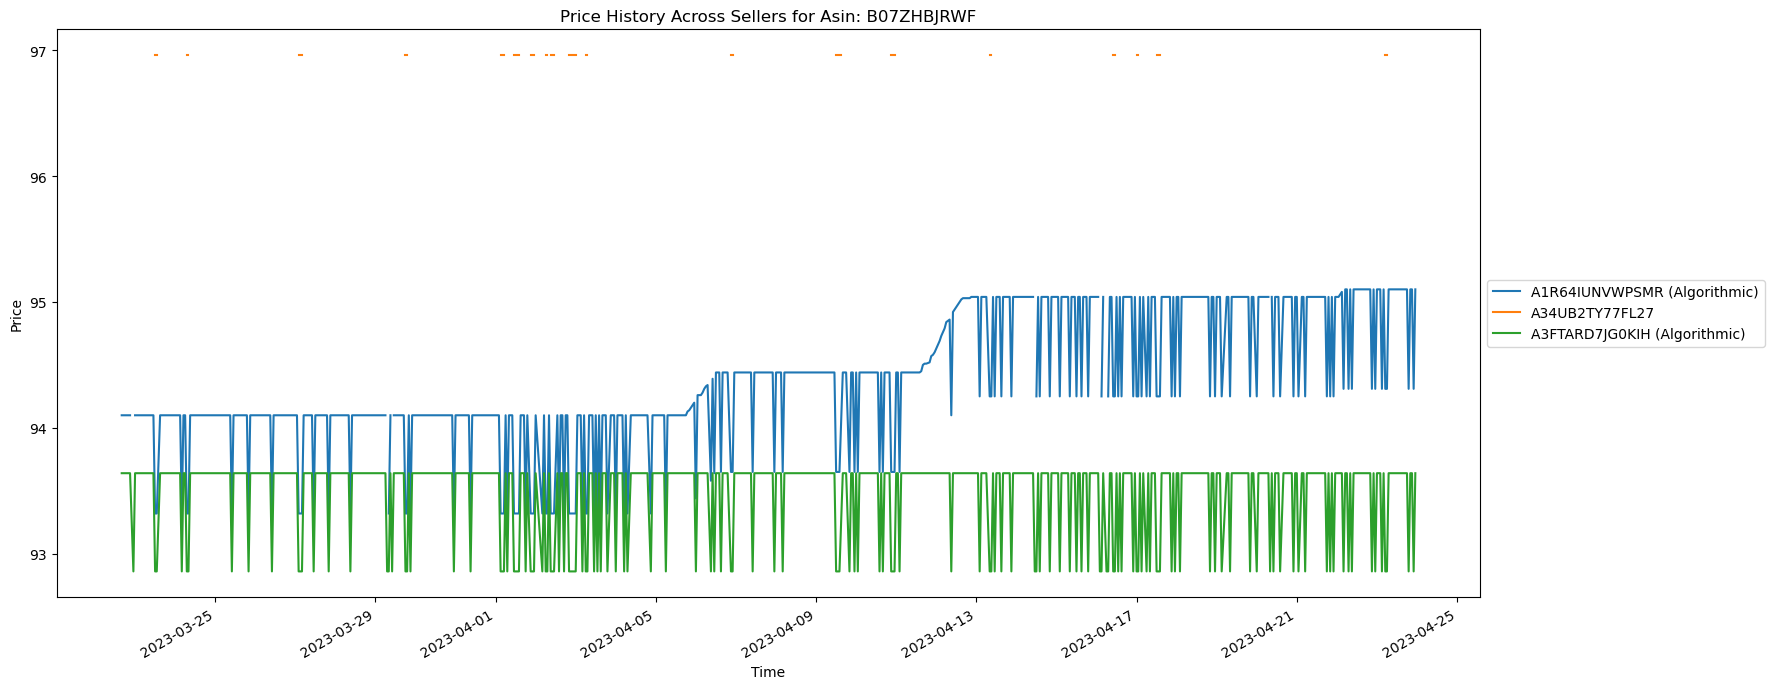

This is the ASIN B07ZHBJRWF


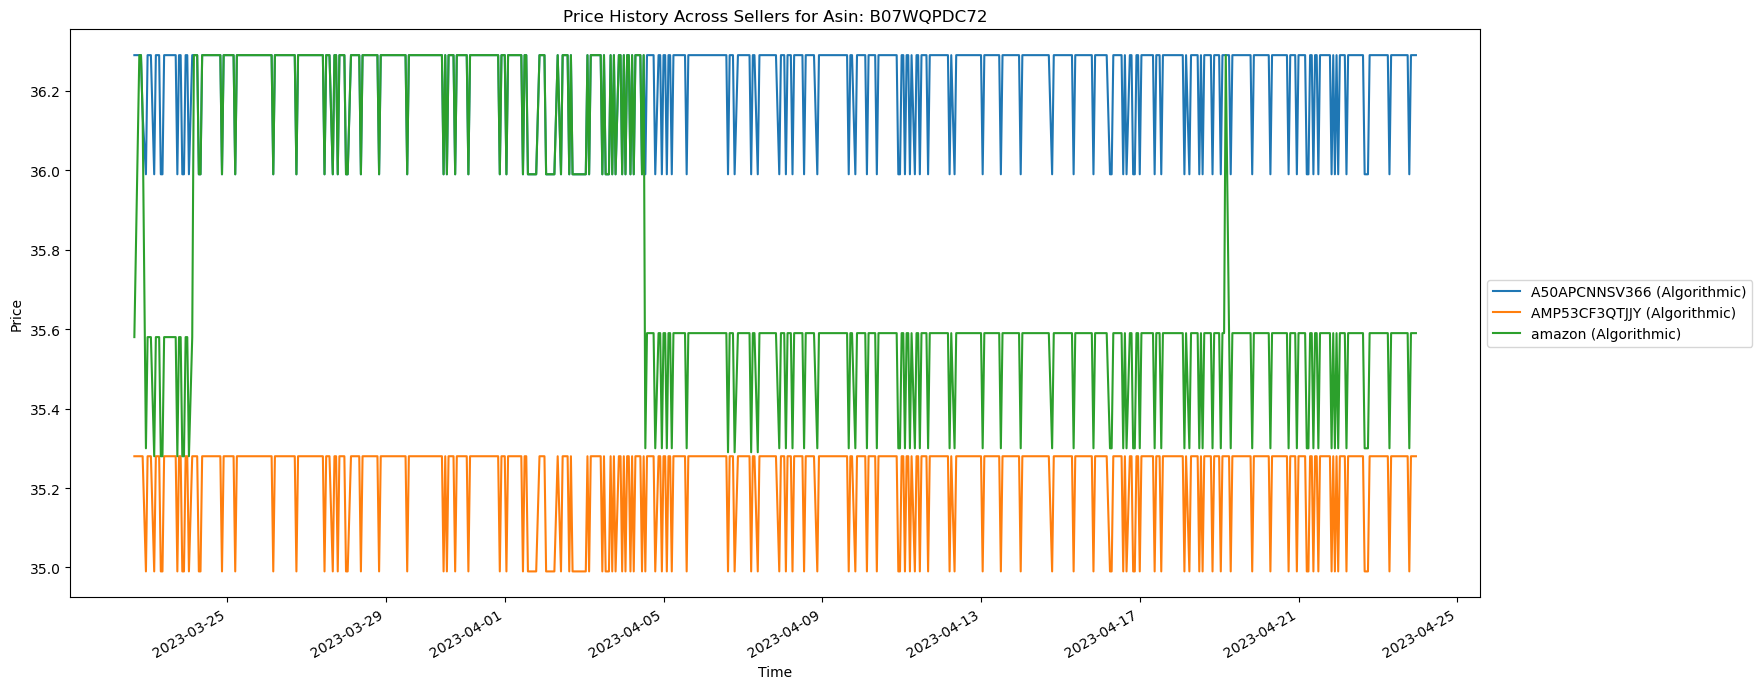

This is the ASIN B07WQPDC72


In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract unique ASINs
unique_asins = df['asin'].unique()

# Loop over unique ASINs
for asin in asins_perfect_matching:
    # Filter DataFrame for the selected ASIN and select necessary columns
    asin_df = df[df['asin'] == asin][['time', 'price', 'sellerId', 'is_algorithmic']].copy()

    # Convert 'time' to datetime object
    asin_df['time'] = pd.to_datetime(asin_df['time'])

    # Group by 'time', 'sellerId', and 'is_algorithmic', calculate mean of 'price'
    grouped_df = asin_df.groupby(['time', 'sellerId', 'is_algorithmic']).mean().reset_index()

    # Add algorithmic info to sellerId
    grouped_df['sellerId'] = grouped_df.apply(lambda row: f"{row['sellerId']} (Algorithmic)" if row['is_algorithmic'] else f"{row['sellerId']}", axis=1)

    # Pivot the DataFrame
    pivot_df = grouped_df.pivot(index='time', columns='sellerId', values='price')

    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 7))
    pivot_df.plot(kind='line', ax=ax)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Price History Across Sellers for Asin: {asin}')
    plt.tight_layout()

    # Move the legend outside the plot on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

    print("This is the ASIN", asin)


In [48]:
## Interessante ASINS

asins_perfect_matching = ['B0062VH4NM','B0797CV4TX','B07RY6RDV7','B077T3QZ1H','B07ZHBJRWF','B07WQPDC72',]
asins_intresting = ['B099NPYRVF','B00J7GVPY8','B0196Q9PVS','B000GISU1M','B09R1QSHN9','B07MTG5V14',]